In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("regression-one.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.rename(columns = {"Life expectancy" : "life-expect"}, inplace = True)
df.head()

,Country,Year,Status,life-expect,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df = df.dropna()
df.shape

(1649, 22)

In [7]:
df[df.isnull().any(axis=1)]

,Country,Year,Status,life-expect,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [9]:
X = df[["GDP", "Alcohol", "BMI", "Schooling"]]
Y = df[["life-expect"]]

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [11]:
lm.intercept_

array([42.85195669])

In [12]:
lm.coef_

array([[ 1.15265737e-04, -2.52732304e-01,  8.91904815e-02,
         1.94339619e+00]])

In [13]:
Yhat = lm.predict(X)

In [17]:
data = pd.DataFrame({"Actual": df["life-expect"].values, "Predicted": Yhat.flatten()})
data.head(20)

,Actual,Predicted
0,65.0,64.248614
1,59.9,64.012957
2,59.9,63.776218
3,59.5,63.541688
4,59.2,62.853093
5,58.8,62.281935
6,58.6,61.641938
7,58.1,61.195248
8,57.5,60.569755
9,57.3,59.928401


/Users/thirijewel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/thirijewel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


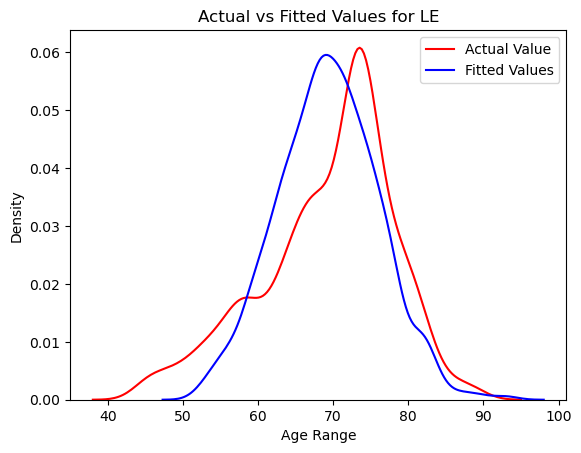

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

Yhat = lm.predict(X)  

sns.distplot(df["life-expect"], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values")

plt.title("Actual vs Fitted Values for LE")
plt.xlabel("Age Range")
plt.legend()  

plt.show()



In [35]:
X = df[["percentage expenditure", "Total expenditure", "Income composition of resources", "Schooling"]]
Y = df[["life-expect"]]

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [37]:
lm.intercept_

array([42.67707303])

In [39]:
lm.coef_

array([[ 4.66431722e-04, -2.99480953e-02,  1.79345642e+01,
         1.25009214e+00]])

In [40]:
Yhat = lm.predict(X)

In [41]:
data = pd.DataFrame({"Actual": df["life-expect"].values, "Predicted": Yhat.flatten()})
data.head(20)

,Actual,Predicted
0,65.0,63.682530
1,59.9,63.504165
2,59.9,63.272904
3,59.5,63.012989
4,59.2,62.462859
5,58.8,61.974248
6,58.6,61.330859
7,58.1,61.081142
8,57.5,60.424229
9,57.3,59.851813


/Users/thirijewel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/thirijewel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


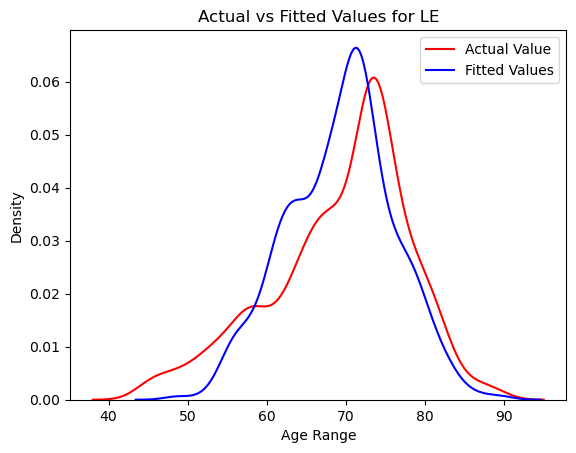

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

Yhat = lm.predict(X)  

sns.distplot(df["life-expect"], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values")

plt.title("Actual vs Fitted Values for LE")
plt.xlabel("Age Range")
plt.legend()  

plt.show()
